In [1]:
import mysofa
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
from IPython.display import display, Audio
%matplotlib nbagg

In [2]:
rate,signal = scipy.io.wavfile.read('wav/ariva_Izotop.wav', 'r')
rate,noise_left = scipy.io.wavfile.read('wav/back_left.wav', 'r')
rate,noise_right = scipy.io.wavfile.read('wav/back_right.wav', 'r')

length = np.min((len(signal), len(noise_left),len(noise_right)))
signal = signal[:length]
noise_left = noise_left[:length]
noise_right = noise_right[:length]


<IPython.core.display.Javascript object>


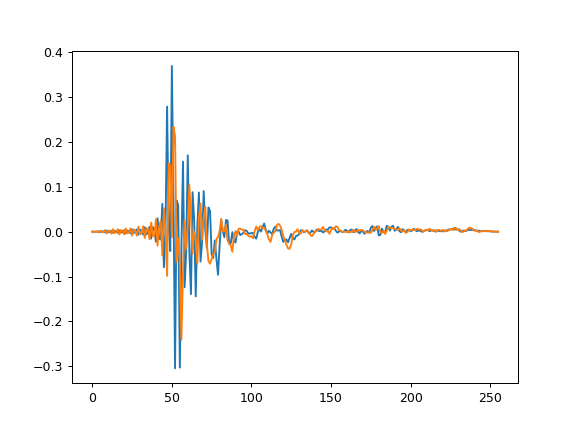

In [19]:
spatilizer_ff = mysofa.MySofa("sofa/RIEC_hrir_subject_048.sofa",rate)
spatilizer = mysofa.MySofa("sofa/hrtf b_nh42.sofa",rate)

spatilizer.set_filter(x=1.0,y=-0.0,z=0.0)
plt.figure()
plt.plot(spatilizer.ir_left)
plt.plot(spatilizer.ir_right)
plt.show()

In [178]:
spatilizer.set_filter(x=1.0,y=-0.03,z=0.0)
spat_sig = spatilizer.apply(signal)

# spatilizer.set_filter(x=-1.0,y=0.0,z=0.0)
# noise_ref = spatilizer.apply(noise_left)

spatilizer.set_filter(x=-1.0,y=1.0,z=0.5)
noise_sig_1 = spatilizer.apply(noise_left)

spatilizer.set_filter(x=-0.5,y=-1.0,z=0.5)
noise_sig_2 = spatilizer.apply(noise_right)

total_sig = spat_sig*2.5 + noise_sig_1*1.4 + noise_sig_2*3 #+ #noise_ref/6

scipy.io.wavfile.write("wav/result.wav",rate,1*total_sig.T.astype("int16"))

In [170]:
display(Audio(total_sig,rate=rate))